In [2]:
import numpy as np
import dl_commons as dlc
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import viz_commons as viz

Using TensorFlow backend.


In [3]:
width = None
pd.options.display.max_rows = 600
pd.options.display.max_columns = width
pd.options.display.max_colwidth = 600
pd.options.display.width = width
pd.options.display.max_seq_items = None
pd.options.display.expand_frame_repr = False
pd.options.display.colheader_justify = 'left'

In [87]:
reload(viz)
runs = (
    '/zpool_3TB/i2l/tb_metrics/2017-12-06 15-40-46 PST score_86.14',
    '/zpool_3TB/i2l/tb_metrics/2017-12-07 23-23-25 PST score_87.45',
    '/zpool_3TB/i2l/tb_metrics/2017-12-10 12-52-23 PST score_88.17',
    '/zpool_3TB/i2l/tb_metrics/2017-12-11 22-57-42 PST noInitModel_score_86.54',
    '/zpool_3TB/i2l/tb_metrics/2017-12-12 19-49-24 PST noInitModel_score_88.10',
    '/zpool_3TB/i2l/tb_metrics/2017-12-16 18-51-38 PST pLambda=0_score_88.86',
    '/zpool_3TB/i2l/tb_metrics/2017-12-21 02-20-10 PST 140K_score_89.0',
    '/zpool_3TB/i2l/tb_metrics/2017-12-23 22-02-35 PST 140K_noInitModel_score_88.74',
    '/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09',
    '/zpool_3TB/i2l/tb_metrics/2017-12-28 13-46-23 PST 140K_noRegroup_noInitModel_beta2=0.6_score85.96',
    '/zpool_3TB/i2l/tb_metrics/2017-12-31 11-32-42 PST 140K_noRegroup_noInitModel_beta2=0.90_beta1=0.25_score88.05/00169865_beta2=0.90_beta1=0.1_score88.20'
)
runs = viz.EvalRuns(runs, ['raw_data_dir', 'pLambda', 'build_init_model', 'REGROUP_IMAGE', 'adam_alpha', 'adam_beta1', 'adam_beta2'], metric_names=['select_max%validation/.*bleu2', 'selected%edit_distance', 'min%edit_distance', 'max%validation/.*bleu$'])
df = runs.df

Loaded /zpool_3TB/i2l/tb_metrics/2017-12-06 15-40-46 PST score_86.14/store/hyper.pkl
Loaded /zpool_3TB/i2l/tb_metrics/2017-12-07 23-23-25 PST score_87.45/store/hyper.pkl
Loaded /zpool_3TB/i2l/tb_metrics/2017-12-10 12-52-23 PST score_88.17/store/hyper.pkl
Loaded /zpool_3TB/i2l/tb_metrics/2017-12-11 22-57-42 PST noInitModel_score_86.54/store/hyper.pkl
Loaded /zpool_3TB/i2l/tb_metrics/2017-12-12 19-49-24 PST noInitModel_score_88.10/store/hyper.pkl
Loaded /zpool_3TB/i2l/tb_metrics/2017-12-16 18-51-38 PST pLambda=0_score_88.86/store/hyper.pkl
Loaded /zpool_3TB/i2l/tb_metrics/2017-12-21 02-20-10 PST 140K_score_89.0/store/hyper.pkl
Loaded /zpool_3TB/i2l/tb_metrics/2017-12-23 22-02-35 PST 140K_noInitModel_score_88.74/store/hyper.pkl
Loaded /zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/store/hyper.pkl
Loaded /zpool_3TB/i2l/tb_metrics/2017-12-28 13-46-23 PST 140K_noRegroup_noInitModel_beta2=0.6_score85.96/store/hyper.pkl
Loaded /zpool_3TB/i2l/tb_metrics/2017-12-31 1

In [88]:
df

,raw_data_dir,pLambda,build_init_model,REGROUP_IMAGE,adam_alpha,adam_beta1,adam_beta2,select_max%validation/top_1/bleu2,selected%validation/top_1/edit_distance,min%validation/top_1/edit_distance,max%validation/top_1/bleu
/zpool_3TB/i2l/tb_metrics/2017-12-06 15-40-46 PST score_86.14,../data/dataset3/training_56/,0.0005,undefined,"[4, 1]",0.0001,undefined,undefined,0.8614 @ 87150,0.0847 @ 87150,0.0846 @ 98700,0.8643 @ 87675
/zpool_3TB/i2l/tb_metrics/2017-12-07 23-23-25 PST score_87.45,../data/dataset3/training_56/,0.0005,True,"[4, 1]",0.0001,undefined,undefined,0.8745 @ 129850,0.0744 @ 129850,0.0744 @ 129850,0.8757 @ 129850
/zpool_3TB/i2l/tb_metrics/2017-12-10 12-52-23 PST score_88.17,../data/dataset3/training_56/,0.0005,True,"[4, 1]",0.0001,0.5,0.9,0.8817 @ 106925,0.0765 @ 106925,0.0730 @ 112525,0.8774 @ 112525
/zpool_3TB/i2l/tb_metrics/2017-12-11 22-57-42 PST noInitModel_score_86.54,../data/dataset3/training_56/,0.0005,False,"[4, 1]",0.0001,0.5,0.9,0.8654 @ 63525,0.0818 @ 63525,0.0803 @ 58450,0.8664 @ 58450
/zpool_3TB/i2l/tb_metrics/2017-12-12 19-49-24 PST noInitModel_score_88.10,../data/dataset3/training_56/,0.0005,False,"[4, 1]",0.0001,0.5,0.9,0.8810 @ 179812,0.0750 @ 179812,0.0738 @ 181212,0.8745 @ 181212
/zpool_3TB/i2l/tb_metrics/2017-12-16 18-51-38 PST pLambda=0_score_88.86,../data/dataset3/training_56,0.0000,True,"[4, 1]",0.0001,0.5,0.9,0.8886 @ 115675,0.0688 @ 115675,0.0687 @ 133875,0.8825 @ 133875
/zpool_3TB/i2l/tb_metrics/2017-12-21 02-20-10 PST 140K_score_89.0,../data/dataset5/training_56,0.0000,True,"[4, 1]",0.0001,0.5,0.9,0.8900 @ 147087,0.0677 @ 147087,0.0669 @ 139737,0.8868 @ 177187
/zpool_3TB/i2l/tb_metrics/2017-12-23 22-02-35 PST 140K_noInitModel_score_88.74,../data/dataset5/training_56,0.0000,False,"[4, 1]",0.0001,0.5,0.9,0.8874 @ 126921,0.0691 @ 126921,0.0689 @ 123346,0.8834 @ 126921
/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09,../data/dataset5/training_56,0.0000,True,None,0.0001,0.5,0.9,0.8909 @ 146585,0.0684 @ 146585,0.0675 @ 126921,0.8867 @ 166249
/zpool_3TB/i2l/tb_metrics/2017-12-28 13-46-23 PST 140K_noRegroup_noInitModel_beta2=0.6_score85.96,../data/dataset5/training_56,0.0000,False,None,0.0001,0.5,0.6,0.8596 @ 105469,0.0889 @ 105469,0.0858 @ 107257,0.8595 @ 107257


In [84]:
runs.hypers['/zpool_3TB/i2l/tb_metrics/2017-12-16 18-51-38 PST pLambda=0_score_88.86']

{'B': 28,
 'CALSTM_STACK': [{'B': 28,
   'CTCBlankTokenID': 357,
   'D': 2048,
   'D0': 512,
   'H': 1,
   'H0': 4,
   'K': 358,
   'L': 34,
   'L0': 136,
   'MaxSeqLen': 151,
   'NullTokenID': 0,
   'REGROUP_IMAGE': [4, 1],
   'SpaceTokenID': None,
   'StartTokenID': 1,
   'W': 34,
   'W0': 34,
   'att_layers': {'layers': [{'activation_fn': <function tensorflow.python.ops.math_ops.tanh>,
      'biases_initializer': <tensorflow.python.ops.init_ops.Zeros at 0x7eff4eda3f90>,
      'biases_regularizer': None,
      'dropout': None,
      'num_units': 256,
      'tb': {'tb_activations': 'Activations',
       'tb_biases': 'Biases',
       'tb_logdir': './tb_metrics/2017-12-16 18-51-38 PST pLambda=0_score_88.47',
       'tb_weights': 'Weights'},
      'weights_initializer': <function tensorflow.contrib.layers.python.layers.initializers._initializer>,
      'weights_regularizer': <function tensorflow.contrib.layers.python.layers.regularizers.l2>},
     {'activation_fn': <function tensorflow.p

In [21]:
reader = viz.TBSummaryReader('/zpool_3TB/i2l/tb_metrics/2017-12-31 11-32-42 PST 140K_noRegroup_noInitModel_beta2=0.90_beta1=0.25_score88.05/00169865_beta2=0.90_beta1=0.1_score88.20', 56)
df = reader.read('(validation|training)/.*(bleu|edit_distance|ctc_ed|logloss_mean)')


processing file /zpool_3TB/i2l/tb_metrics/2017-12-31 11-32-42 PST 140K_noRegroup_noInitModel_beta2=0.90_beta1=0.25_score88.05/00169865_beta2=0.90_beta1=0.1_score88.20/events.out.tfevents.1514925761.DeepLearner
(0.937850177288,
0.94123929739)

(0.0361549183726,
0.0360923372209)

(0.93271869421,
0.943310081959)

(0.0167569741607,
0.0122567526996)



In [23]:
df['_step'].max()

242500

In [6]:
np.arange(101)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

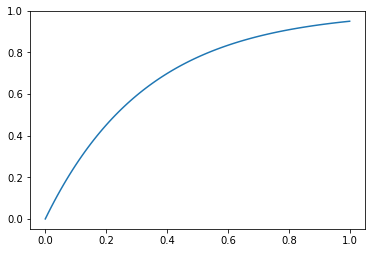

In [7]:
x = np.arange(101)/100.0
y = 1-np.exp(-3*x)
plt.plot(x, y)
#plt.plot(x, 1-y)
plt.show()

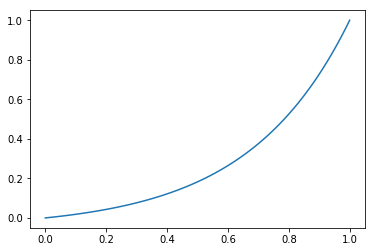

(0.0, 1.0)


In [8]:
n = 3
e = np.exp(n)
x = np.arange(101)/100.0
y = (np.exp(n*x)-1)/(e-1)
plt.plot(x, y)
#plt.plot(x, 1-y)
plt.show()
print(y[0],y[-1])

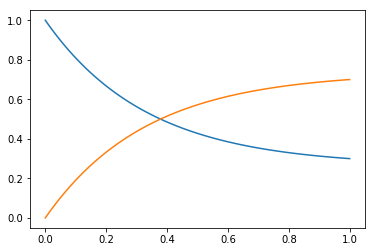

(1.0, 0.29999999999999999)


In [9]:
N = 3
MIN = 0.3
x = np.arange(101)/100.0  # [0-1]
D = np.exp(N)-1
e = np.exp(N*(x-1))
y = (1-e)/(e*D)
y = y*(1-MIN)+MIN  # 
plt.plot(x, y)
plt.plot(x, 1-y)
plt.show()
print(y[0],y[-1])

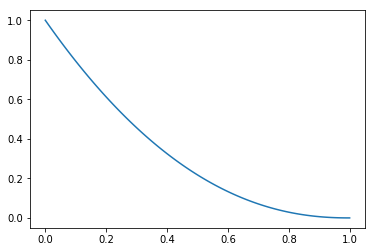

(1.0, 0.0)


In [10]:
x = np.arange(101)/100.0
y = np.power(1-x, 2.2)
plt.plot(x, y)
plt.show()
print(y[0], y[-1])

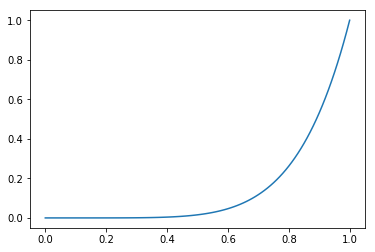

(0.0, 1.0)


In [11]:
x = np.arange(101)/100.0
y = np.power(x,6)
plt.plot(x, y)
plt.show()
print(y[0], y[-1])

In [9]:
import itertools

ar = np.arange(100).reshape((10,10))

In [27]:
rows = [(row==0).any() for row in ar][::-1]
rows

[False, False, False, False, False, False, False, False, False, True]

In [28]:
[x for x in itertools.takewhile(lambda x: x, rows)]

[]

In [24]:
rows

[True, False, False, False, False, False, False, False, False, False]